In [ ]:
# Klaudia Dikunow
# 07.01.2020
# Data source: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

## 1. Libraries import

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

## 2. Reading the data

In [125]:
df = pd.read_csv('D:/kaggle/Mall customers/mall/Mall_Customers.csv')

In [126]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [127]:
df.shape

(200, 5)

In [128]:
num_cols= ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

## 3. Explanatory Data Analysis

#### Genre

In [129]:
df['Genre'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Genre, dtype: float64

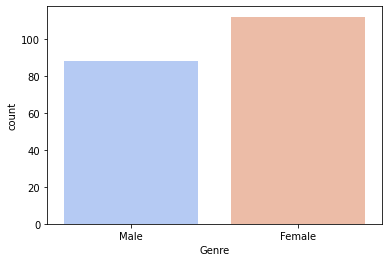

In [134]:
ax = sns.countplot(x="Genre", data=df, palette='coolwarm')

#### Numeric columns

In [131]:
df[num_cols].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


#### Correlation between features

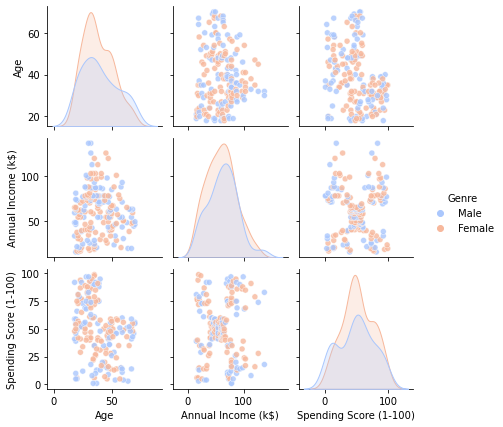

In [132]:
sns.pairplot(df, x_vars = num_cols, 
               y_vars = num_cols, 
               hue = "Genre", 
               kind= "scatter",
               palette = "coolwarm",
               height = 2,
               plot_kws={"s": 35, "alpha": 0.8});

## 4. Data preprocessing

### 4.1. Missing data

In [65]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Age_log                   0
dtype: int64

In [66]:
# There are no missing variables in the dataset

### 4.2. One hot encoding

In [78]:
to_dummify = ['Genre']

In [79]:
for i in to_dummify:
    dummy = pd.get_dummies(df[i], prefix = i)
    mask = pd.DataFrame(df[i].value_counts(sort=True)).index[1] 
    dummy.drop(i+'_'+mask, inplace=True, axis=1)
    df = pd.concat([df,dummy], axis=1)
    df.drop(i, inplace=True, axis=1)

In [80]:
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Age_log,Genre_Female
0,1,19,15,39,2.944439,0
1,2,21,15,81,3.044522,0
2,3,20,16,6,2.995732,1
3,4,23,16,77,3.135494,1
4,5,31,17,40,3.433987,1
...,...,...,...,...,...,...
195,196,35,120,79,3.555348,1
196,197,45,126,28,3.806662,1
197,198,32,126,74,3.465736,0
198,199,32,137,18,3.465736,0


## 5. Checking for K-Means assumptions

### 5.1. Symetric distribution

C:\Users\klaud\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\klaud\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\klaud\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

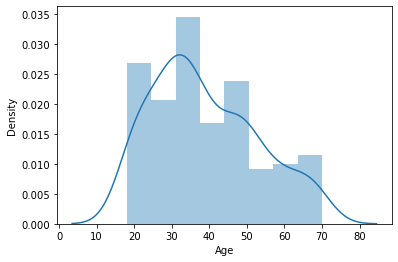

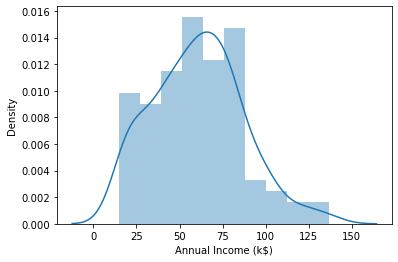

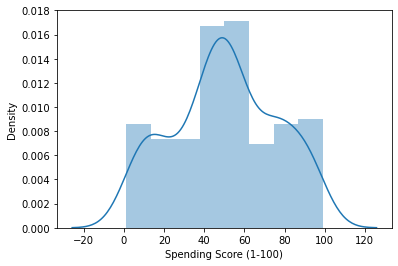

In [44]:
for i, col in enumerate(num_cols):
    plt.figure(i)
    sns.distplot(df[col])

In [45]:
for i in num_cols:
    print(i, 'skeweness: ', df[i].skew())

Age skeweness:  0.48556885096681657
Annual Income (k$) skeweness:  0.3218425498619055
Spending Score (1-100) skeweness:  -0.047220201374263374


In [46]:
for i in num_cols:
    print(i, 'skeweness after transformation: ', np.log(df[i]).skew())

Age skeweness after transformation:  -0.10668786468077522
Annual Income (k$) skeweness after transformation:  -0.7596281254451491
Spending Score (1-100) skeweness after transformation:  -1.8066668619434054


In [17]:
# Skeweness shrinks for Age variable after logaritmic transformation

In [47]:
df['Age_log'] = np.log(df['Age'])

C:\Users\klaud\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


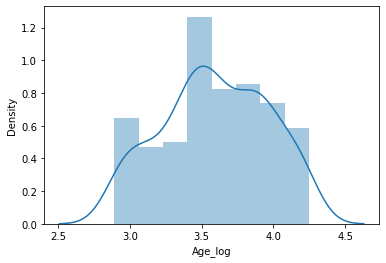

In [49]:
sns.distplot(df['Age_log'])

### 5.2. Centered features

In [50]:
scaler = StandardScaler()

In [51]:
scale_cols = ['Age_log', 'Annual Income (k$)', 'Spending Score (1-100)']

In [52]:
df_scaled = pd.DataFrame(scaler.fit_transform(df[scale_cols]), columns=scale_cols)

In [53]:
df_scaled

,Age_log,Annual Income (k$),Spending Score (1-100)
0,-1.774480,-1.738999,-0.434801
1,-1.501140,-1.738999,1.195704
2,-1.634392,-1.700830,-1.715913
3,-1.252686,-1.700830,1.040418
4,-0.437467,-1.662660,-0.395980
...,...,...,...
195,-0.106016,2.268791,1.118061
196,0.580353,2.497807,-0.861839
197,-0.350757,2.497807,0.923953
198,-0.350757,2.917671,-1.250054


In [54]:
df_scaled.describe().round(2)

,Age_log,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00
mean,0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-1.92,-1.74,-1.91
25%,-0.64,-0.73,-0.60
50%,-0.03,0.04,-0.01
75%,0.81,0.67,0.89
max,1.79,2.92,1.89


In [24]:
# After scalling all numeric features have mean of 0 and standard deviation of 1

## 6. K-Means clustering

### 6.1. Number of clusters

In [55]:
sse = {}
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(df_scaled)
    sse[i] = kmeans.inertia_

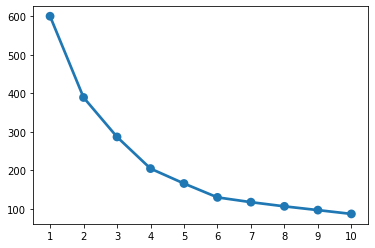

In [56]:
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [27]:
# Elbow plot does not explicitly say how many cluster to use - thus I will try clustering with 4,5 and 6 clusters

### 6.2. Model with 4 clusters

In [57]:
kmeans4 = KMeans(n_clusters=4, random_state=1)

In [58]:
kmeans4.fit(df_scaled)

KMeans(n_clusters=4, random_state=1)

In [59]:
cluster_labels4 = kmeans4.labels_

In [83]:
df_c = df.assign(Cluster4 = cluster_labels4)

In [84]:
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Age_log,Genre_Female
0,1,19,15,39,2.944439,0
1,2,21,15,81,3.044522,0
2,3,20,16,6,2.995732,1
3,4,23,16,77,3.135494,1
4,5,31,17,40,3.433987,1
...,...,...,...,...,...,...
195,196,35,120,79,3.555348,1
196,197,45,126,28,3.806662,1
197,198,32,126,74,3.465736,0
198,199,32,137,18,3.465736,0


#### Summary

In [170]:
df_c.groupby(['Cluster4']).agg({
    'CustomerID': 'count',
    'Genre_Female': 'mean',
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
})

,CustomerID,Genre_Female,Age,Annual Income (k$),Spending Score (1-100)
Cluster4,,,,,
0,54,0.611111,24.851852,40.388889,61.333333
1,67,0.567164,52.835821,46.477612,40.582090
2,40,0.550000,32.875000,86.100000,81.525000
3,39,0.487179,40.333333,86.487179,19.179487


In [ ]:
# Cluster 0 is dominated with young women with low annual income and medium spending score
# In cluster 1 most of the people are also women, they are in middle age (although it is the oldest cluster), rather low annual
# income and quite low spending score
# Clusters 2 and 3 are characterized by high annual income, however in cluster 2 spending score is really high, while in cluster 3
# spending score is the lowest among all clusters. In cluster 2 there are proportionally a little bit more women than in cluster 3.
# Average age is lower in cluster 2 but both of them consist of people in late-young ages.

#### Relative importance of segment attributes

In [149]:
cluster4_avg = df_c[['Genre_Female', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster4']].groupby(['Cluster4']).mean()

In [151]:
pop_avg4 = df_c[['Genre_Female', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster4']].mean()

In [152]:
relative_imp4 = cluster4_avg/pop_avg4 - 1

In [167]:
relative_imp4[['Genre_Female', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

,Genre_Female,Age,Annual Income (k$),Spending Score (1-100)
Cluster4,,,,
0,0.091270,-0.360313,-0.333076,0.221780
1,0.012793,0.359995,-0.232536,-0.191592
2,-0.017857,-0.153797,0.421731,0.624004
3,-0.130037,0.038181,0.428124,-0.617939


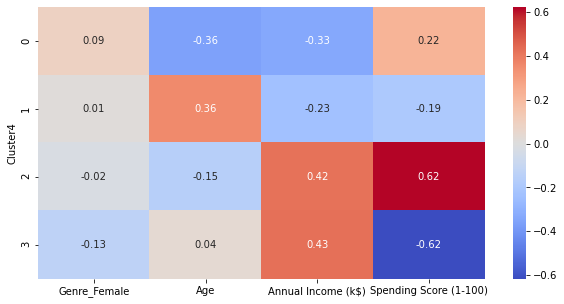

In [154]:
plt.figure(figsize=(10,5))
sns.heatmap(data=relative_imp4[['Genre_Female', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']], annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [ ]:
# Relative importance figure shows that in fact cluster 0 is dominated with the youngest people and cluster 1 with the oldest.
# Annual income is much above average in clusters 2 and 3, while in 0 and 1 it is below average.
# Spending score is the highest in cluster 2 and the lowest in cluster 3.

### 5.3. Model with 5 clusters

In [137]:
kmeans5 = KMeans(n_clusters=5, random_state=1)

In [138]:
kmeans5.fit(df_scaled)

KMeans(n_clusters=5, random_state=1)

In [139]:
cluster_labels5 = kmeans5.labels_

In [140]:
df_c = df_c.assign(Cluster5 = cluster_labels5)

#### Summary

In [169]:
df_c.groupby(['Cluster5']).agg({
    'CustomerID': 'count',
    'Genre_Female': 'mean',
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
})

,CustomerID,Genre_Female,Age,Annual Income (k$),Spending Score (1-100)
Cluster5,,,,,
0,35,0.600000,23.742857,57.857143,42.885714
1,68,0.573529,52.617647,46.779412,40.573529
2,40,0.550000,32.875000,86.100000,81.525000
3,31,0.483871,44.387097,89.774194,18.483871
4,26,0.576923,25.769231,26.115385,74.846154


In [ ]:
# Here clusters 1,2,3 are more or less the same as clusters 1,2,3 in 4-cluster model. 
# The difference is that previous 0 cluster is divided into 2 clusters - 0 and 4. Both consist of young people (mostly women),
# however in cluster 0 annual income is much higher than for cluster 4. However, spending score is much higher in cluster 4.
# Because these two clusters differ quite a lot, I consider this modelling to be superior over the previous one.

#### Relative importance of segment attributes

In [155]:
cluster5_avg = df_c[['Genre_Female', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster5']].groupby(['Cluster5']).mean()

In [156]:
pop_avg5 = df_c[['Genre_Female', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster5']].mean()

In [157]:
relative_imp5 = cluster5_avg/pop_avg5 - 1

In [165]:
relative_imp5[['Genre_Female', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

,Genre_Female,Age,Annual Income (k$),Spending Score (1-100)
Cluster5,,,,
0,0.071429,-0.388858,-0.044631,-0.145703
1,0.024160,0.354380,-0.227553,-0.191762
2,-0.017857,-0.153797,0.421731,0.624004
3,-0.135945,0.142525,0.482401,-0.631795
4,0.030220,-0.336699,-0.568768,0.490959


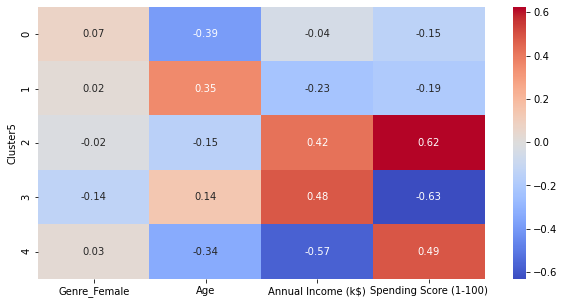

In [159]:
plt.figure(figsize=(10,5))
sns.heatmap(data=relative_imp5[['Genre_Female', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']], annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

### 5.4. Model with 6 clusters

In [73]:
kmeans6 = KMeans(n_clusters=6, random_state=1)

In [74]:
kmeans6.fit(df_scaled)

KMeans(n_clusters=6, random_state=1)

In [75]:
cluster_labels6 = kmeans6.labels_

In [90]:
df_c = df_c.assign(Cluster6 = cluster_labels6)

#### Summary

In [171]:
df_c.groupby(['Cluster6']).agg({
    'CustomerID': 'count',
    'Genre_Female': 'mean',
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
})

,CustomerID,Genre_Female,Age,Annual Income (k$),Spending Score (1-100)
Cluster6,,,,,
0,20,0.600000,46.800000,26.800000,20.050000
1,39,0.538462,32.692308,86.538462,82.128205
2,35,0.600000,23.742857,57.857143,42.885714
3,25,0.560000,25.560000,26.480000,76.240000
4,31,0.483871,44.387097,89.774194,18.483871
5,50,0.580000,54.260000,54.620000,49.120000


In [ ]:
# In 6-cluster analysiss clusters 2 and 3 are more or less the same as clusters 0 and 4 in 5-cluster analysis.
# Cluster 1 matches cluster 2 from previous analysis.
# Cluster 4 matches cluster 3 from previous analysis.
# Clusters 0 and 5 divide previous cluster 1 in two clusters. In terms of gender they are similar, however both average annual
# income and average spending score is much higher for cluster 5 than for cluster 0.

#### Relative importance of segment attributes

In [160]:
cluster6_avg = df_c[['Genre_Female', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster6']].groupby(['Cluster6']).mean()

In [161]:
pop_avg6 = df_c[['Genre_Female', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster6']].mean()

In [162]:
relative_imp6 = cluster6_avg/pop_avg6 - 1

In [166]:
relative_imp6[['Genre_Female', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

,Genre_Female,Age,Annual Income (k$),Spending Score (1-100)
Cluster6,,,,
0,0.071429,0.204633,-0.557464,-0.600598
1,-0.038462,-0.158499,0.428971,0.636020
2,0.071429,-0.388858,-0.044631,-0.145703
3,0.000000,-0.342085,-0.562748,0.518725
4,-0.135945,0.142525,0.482401,-0.631795
5,0.035714,0.396654,-0.098085,-0.021514


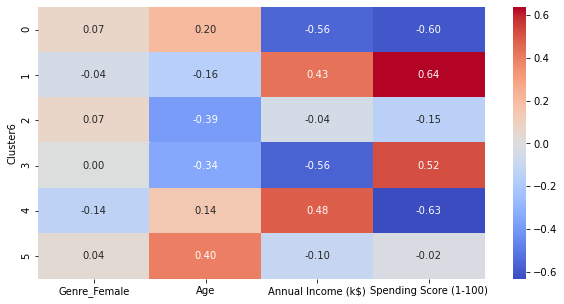

In [164]:
plt.figure(figsize=(10,5))
sns.heatmap(data=relative_imp6[['Genre_Female', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']], annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [ ]:
# Conclusion: I would select either 5 or 6 clusters. 6 clusters describe the population in a little bit more detail, dividing
# better the group of middle-aged people

## 7. Hierarchical clustering

### 7.1. Dendrogram

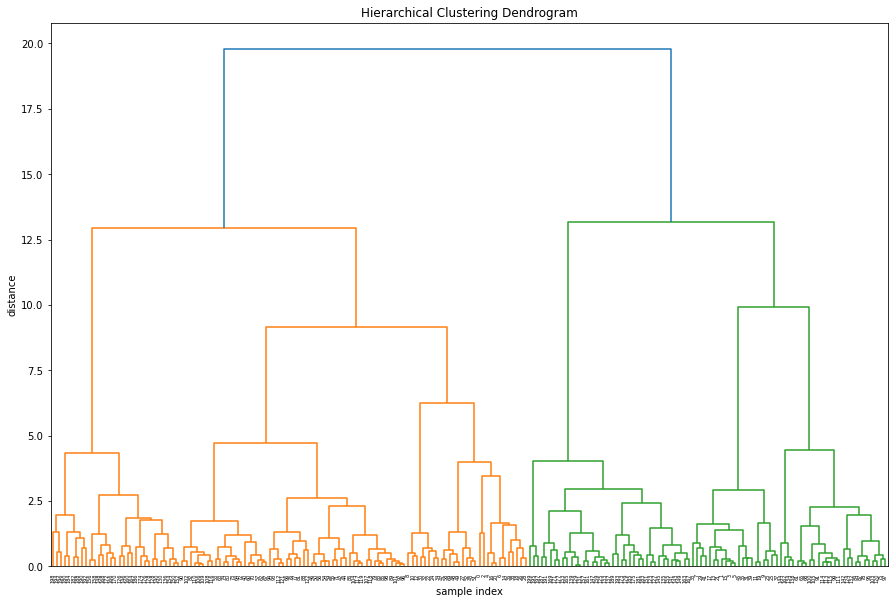

In [172]:
Z = linkage(df_scaled, method='ward', metric='euclidean')
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dn = dendrogram(Z)
plt.show()

### 7.2. Model with 4 clusters

In [173]:
cluster4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster4.fit_predict(df_scaled)

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int64)

In [175]:
cluster_labels4h = cluster4.labels_

In [176]:
df_c = df_c.assign(Cluster4_hier = cluster_labels4h)

#### Summary

In [178]:
df_c.groupby(['Cluster4_hier']).agg({
    'CustomerID': 'count',
    'Genre_Female': 'mean',
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
})

,CustomerID,Genre_Female,Age,Annual Income (k$),Spending Score (1-100)
Cluster4_hier,,,,,
0,47,0.531915,23.170213,46.212766,59.468085
1,83,0.614458,48.554217,45.566265,41.795181
2,39,0.538462,32.692308,86.538462,82.128205
3,31,0.483871,44.387097,89.774194,18.483871


In [ ]:
# In hierarchical clustering cluster number 2 can be strictly linked to cluster
# 2 from 4-cluster k-means clustering and cluster number 3 to cluster 3 
# (although average age here is slightly higer). The rest of the clusters is 
# somehow different from what was obtained before. Cluster for the youngest people
# (0) is no longer so discriminant for gender (it's almost 50/50) and annual
# income is higher here than it was before. The most feminine cluster here is 
# cluster number 1 for middle-aged people. Apart from gender distribution it is
# pretty much similar to cluster number 1 from k-means clustering (4 clusters).

#### Relative importance of segment attributes

In [186]:
cluster4_avg = df_c[['Genre_Female', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster4_hier']].groupby(['Cluster4_hier']).mean()

In [187]:
pop_avg4 = df_c[['Genre_Female', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster4_hier']].mean()

In [190]:
relative_imp4 = cluster4_avg/pop_avg4 - 1

In [192]:
relative_imp4[['Genre_Female', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

,Genre_Female,Age,Annual Income (k$),Spending Score (1-100)
Cluster4_hier,,,,
0,-0.050152,-0.403598,-0.236909,0.184623
1,0.097246,0.249787,-0.247585,-0.167427
2,-0.038462,-0.158499,0.428971,0.636020
3,-0.135945,0.142525,0.482401,-0.631795


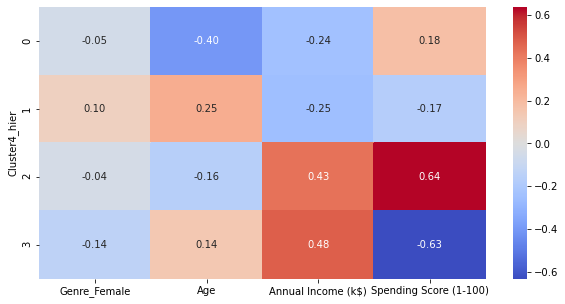

In [196]:
plt.figure(figsize=(10,5))
sns.heatmap(data=relative_imp4[['Genre_Female', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']], annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

### 7.3. Model with 6 clusters

In [181]:
cluster6 = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
cluster6.fit_predict(df_scaled)

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2, 4, 2, 0,
       2, 4, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 5, 1, 5, 3, 5, 3, 5, 3, 5,
       1, 5, 1, 5, 3, 5, 1, 5, 3, 5, 1, 5, 1, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5, 3, 5, 3, 5, 3, 5, 1, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5], dtype=int64)

In [182]:
cluster_labels6h = cluster6.labels_

In [183]:
df_c = df_c.assign(Cluster6_hier = cluster_labels6h)

#### Summary

In [184]:
df_c.groupby(['Cluster6_hier']).agg({
    'CustomerID': 'count',
    'Genre_Female': 'mean',
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
})

,CustomerID,Genre_Female,Age,Annual Income (k$),Spending Score (1-100)
Cluster6_hier,,,,,
0,29,0.655172,39.793103,29.482759,29.206897
1,26,0.461538,21.846154,62.846154,42.692308
2,54,0.592593,53.259259,54.203704,48.555556
3,31,0.483871,44.387097,89.774194,18.483871
4,21,0.619048,24.809524,25.619048,80.238095
5,39,0.538462,32.692308,86.538462,82.128205


In [ ]:
# For 6-cluster analysis young cluster is divided into 2 - clusters 1 and 4 and 
# "the oldest" cluster 1 was divided into clusters 0 and 2. All the divided 
# clusters differ a lot in terms of age, annual income and spending score, thus
# splitting the data into 6 clusters seems to make sense. Two remaining clusters
# (3 and 5) are the same as in 4-cluster hierarchical analysis.

#### Relative importance of segment attributes

In [185]:
cluster6_avg = df_c[['Genre_Female', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster6_hier']].groupby(['Cluster6_hier']).mean()

In [188]:
pop_avg6 = df_c[['Genre_Female', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster6_hier']].mean()

In [189]:
relative_imp6 = cluster6_avg/pop_avg6 - 1

In [191]:
relative_imp6[['Genre_Female', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

,Genre_Female,Age,Annual Income (k$),Spending Score (1-100)
Cluster6_hier,,,,
0,0.169951,0.024276,-0.513164,-0.418189
1,-0.175824,-0.437679,0.037750,-0.149556
2,0.058201,0.370895,-0.104959,-0.032758
3,-0.135945,0.142525,0.482401,-0.631795
4,0.105442,-0.361402,-0.576964,0.598368
5,-0.038462,-0.158499,0.428971,0.636020


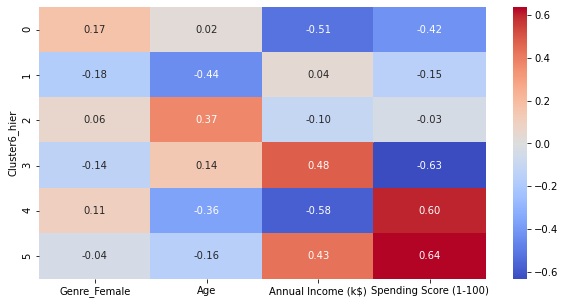

In [195]:
plt.figure(figsize=(10,5))
sns.heatmap(data=relative_imp6[['Genre_Female', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']], annot=True, fmt='.2f', cmap='coolwarm')
plt.show()